**INTRODUCTION ** -
--------------

[DAY 72 lesson]

**Overview of this lesson and the rest of this course.**

What is data science?

Using data to understand and advise?

I'm sure all of you are looking at careers - so let's take a look at some university degrees and then understand what the career prospects and salaries are:

-
-
**Key concepts**

A Notebook - what is it and why do we use it?

MEDIAN - what doe sthis mean?
MEAN?

A Data Frame? - some of you from Nav's Python 4 class from last term will know this!

Pandas - what is this?



   
    

--------------------
--------------------
**PROJECT OVERVIEW**
No need to write this - only an explanation for the teacher.

This data is very USA focused but there will be a lot of commonality with Europe too!

University degrees are very expensive. But, do they pay you back? Choosing Philosophy or International Relations as a major may have worried your parents, but does the data back up their fears? PayScale Inc. did a year-long survey of 1.2 million Americans with only a bachelor's degree. We'll be digging into this data and use Pandas to answer these questions:



Which degrees have the highest starting salaries?

Which majors have the lowest earnings after college?

Which degrees have the highest earning potential?

What are the lowest risk college majors from an earnings standpoint?

Do business, STEM (Science, Technology, Engineering, Mathematics) or HASS (Humanities, Arts, Social Science) degrees earn more on average?

--------------------------
--------------------------

Download the salaries_by_college_major.csv file from the course resources and add this file to the notebook by dropping it into the sidebar with the little folder icon.

You can also select the file and copy its path and paste into here

In [7]:
import pandas as pd
df = pd.read_csv('/content/salaries_by_college_major.csv')


Now take a look at the Pandas dataframe we've just created with .head(). This will show us the first 5 rows of our dataframe.

In [8]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


**Preliminary Data Exploration and Data Cleaning with Pandas**
Now that we've got our data loaded into our dataframe, we need to take a closer look at it to help us understand what it is we are working with. This is always the first step with any data science project. Let's see if we can answer the following questions:



How many rows does our dataframe have?

How many columns does it have?

What are the labels for the columns? Do the columns have names?

Are there any missing values in our dataframe? Does our dataframe contain any bad data?

We've already used the .head() method to peek at the top 5 rows of our dataframe. To see the number of rows and columns we can use the shape attribute:

In [9]:
# Show us the structure of the data whiuch has 51 rows and 6 columns
df.shape

(51, 6)

In [10]:
# We saw that each column had a name.
# We can access the column names directly with the columns attribute.
df.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 90th Percentile Salary', 'Group'],
      dtype='object')


**Missing Values and Junk Data**

Before we can proceed with our analysis we should try and figure out if there are any missing or junk data in our dataframe. That way we can avoid problems later on. In this case, we're going to look for NaN (Not A Number) values in our dataframe. NAN values are blank cells or cells that contain strings instead of numbers. Use the .isna() method and see if you can spot if *there*'s a problem somewhere.

In [11]:
df.isna()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [12]:
# Did you find anything? Check the last couple of rows in the dataframe
df.tail()

# Aha! We have a row that contains some information regarding the
# source of the data with blank values for all the other other columns.

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN



**Delete the Last Row**
We don't want this row in our dataframe. There's two ways you can go about removing this row. The first way is to manually remove the row at index 50.

The second way is to simply use the .dropna() method from pandas. Let's create a new dataframe without the last row and examine the last 5 rows to make sure we removed the last row:

In [13]:
# Delete the not a number rows
clean_df = df.dropna()

# Let's see if that's worked!
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,40800.0,78200.0,41200.0,168000.0,HASS
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS


**Accessing Columns and Individual Cells in a Dataframe**

*Find College Degrees with Highest Starting Salaries*

To access a particular column from a data frame we can use the square bracket notation, like so:

clean_df['Starting Median Salary']
You should see all the values printed out below the cell for just this column:

In [14]:
clean_df['Starting Median Salary']

# TASK
# Can you try accessing other columns of the data frame? - GO AHEAD!

0     46000.0
1     57700.0
2     42600.0
3     36800.0
4     41600.0
5     35800.0
6     38800.0
7     43000.0
8     63200.0
9     42600.0
10    53900.0
11    38100.0
12    61400.0
13    55900.0
14    53700.0
15    35000.0
16    35900.0
17    50100.0
18    34900.0
19    60900.0
20    38000.0
21    37900.0
22    47900.0
23    39100.0
24    41200.0
25    43500.0
26    35700.0
27    38800.0
28    39200.0
29    37800.0
30    57700.0
31    49100.0
32    36100.0
33    40900.0
34    35600.0
35    49200.0
36    40800.0
37    45400.0
38    57900.0
39    35900.0
40    54200.0
41    39900.0
42    39900.0
43    74300.0
44    50300.0
45    40800.0
46    35900.0
47    34100.0
48    36500.0
49    34000.0
Name: Starting Median Salary, dtype: float64

In [15]:
# To find the highest starting salary we can simply chain the .max() method.

clean_df['Starting Median Salary'].max()

74300.0

The highest starting salary is $74,300. But which college major earns this much on average? For this, we need to know the row number or index so that we can look up the name of the major. Lucky for us, the .idxmax() method will give us index for the row with the largest value.

In [16]:
# This will return the row index

clean_df['Starting Median Salary'].idxmax()

# It should return row index 43

43

To see the name of the major that corresponds to that particular row, we can use the .loc (location) property.

In [17]:
clean_df['Undergraduate Major'].loc[43]

# Are your surprised with the result? :)


# TASK
# See if you can find any other interesting columns for row 43?

'Physician Assistant'

If you don't specify a particular column you can use the .loc property to retrieve an entire row:

In [18]:
clean_df.loc[43]

Undergraduate Major                  Physician Assistant
Starting Median Salary                           74300.0
Mid-Career Median Salary                         91700.0
Mid-Career 10th Percentile Salary                66400.0
Mid-Career 90th Percentile Salary               124000.0
Group                                               STEM
Name: 43, dtype: object

**CHALLENGE**
Potential homework assignments

* Now that we've found the major with the highest starting salary, can you write the code to find the following:

* What college major has the highest mid-career salary? How much do graduates with this major earn? (Mid-career is defined as having 10+ years of experience).

* Which college major has the lowest starting salary and how much do graduates earn after university?

* Which college major has the lowest mid-career salary and how much can people expect to earn with this degree?




In [19]:
## SOLUTIONS

# The Highest Mid-Career Salary

print(clean_df['Mid-Career Median Salary'].max())
print(f"Index for the max mid career salary: {clean_df['Mid-Career Median Salary'].idxmax()}")
clean_df['Undergraduate Major'][8]

107000.0
Index for the max mid career salary: 8


'Chemical Engineering'

In [20]:
## SOLUTIONS

# The Lowest STARTING Career Salary

print(clean_df['Starting Median Salary'].min())
clean_df['Undergraduate Major'].loc[clean_df['Starting Median Salary'].idxmin()]

34000.0


'Spanish'

In [ ]:
## SOLUTIONS

# Unfortunately education is the defree with lowest mid-career salary :((
# What do you think about this?
# Is money everything?
# If you were advising Rishi Sunak what would you tell him?

clean_df.loc[clean_df['Mid-Career Median Salary'].idxmin()]

--------------------------
--------------------------
--------------------------

**LESSON 2 - SUMMARY of DATA Frames and Visualisation of the data **




**Grouping and Pivoting Data with Pandas**

Often times you will want to sum rows that belong to a particular category. For example, which category of degrees has the highest average salary? Is it STEM, Business or HASS (Humanities, Arts, and Social Science)?

To answer this question we need to learn to use the .groupby() method. This allows us to manipulate data similar to a Microsoft Excel Pivot Table.

We have three categories in the 'Group' column: STEM, HASS and Business. Let's count how many majors we have in each category:

In [22]:
clean_df.groupby('Group').count()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,12,12,12,12,12
HASS,22,22,22,22,22
STEM,16,16,16,16,16


VISUALIATION - We will be using the Plotting library called MATPLOTLIB - some of the class from Nav's previous class.

QUESTION: WHY IS VISUALISATION USEFUL?

- What can it tell you about you data that dataframes cannot?



In [29]:
 # IMPORT THE MODULE For creating charts
 # as plt - is just a well used naming convention - we'll stick with that

import matplotlib.pyplot as plt


<ipython-input-37-31b5399495e6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subset_data['Undergraduate Major'], rotation=45)  # adding the labels for each bar with a rotation


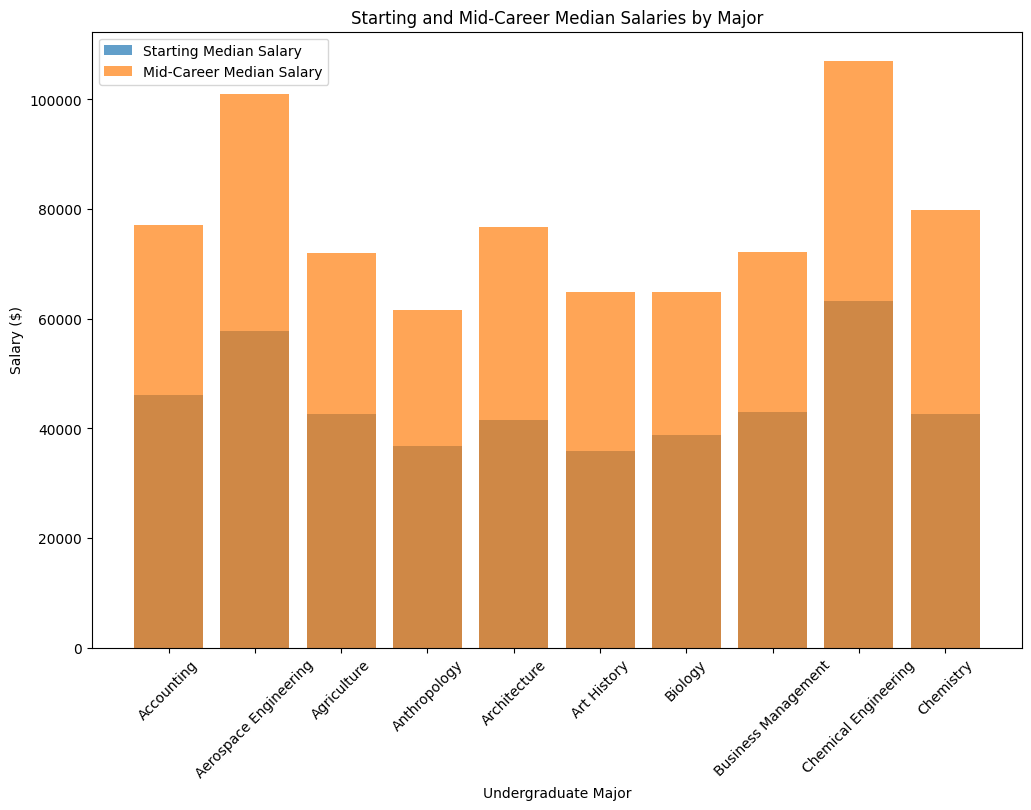

In [37]:
# We will use only the first 10 rows for our bar chart to keep it simple
subset_data = clean_df.head(10)


# Create a bar chart to compare salaries
# Setup the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # size of the chart

# Plotting the bars directly without manually adjusting positions
ax.bar(subset_data['Undergraduate Major'], subset_data['Starting Median Salary'], label='Starting Median Salary', alpha=0.7)
ax.bar(subset_data['Undergraduate Major'], subset_data['Mid-Career Median Salary'], label='Mid-Career Median Salary', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Undergraduate Major')  # label for the x-axis
ax.set_ylabel('Salary ($)')  # label for the y-axis
ax.set_title('Starting and Mid-Career Median Salaries by Major')  # chart title
ax.set_xticklabels(subset_data['Undergraduate Major'], rotation=45)  # adding the labels for each bar with a rotation
ax.legend()  # show legend to identify the bars

# Display the bar chart
plt.show()

**SO WHAT DOES THIS CHART TELL YOU?**

Write down your observations?

The shaded area is the starting salary and the orange is the mid-career salary. Is there any acceleration of salaries for certain type of degrees?

Any other obserevations?

How does this influence your recomemndations to the Prime Minister?

In [34]:

# Create a pie chart to show the distribution of degrees by group
# How many degrees are of a certain type of category?

# count the number of majors in each group
# tallies how many times each unique value appears in the column.
group_counts = clean_df['Group'].value_counts()



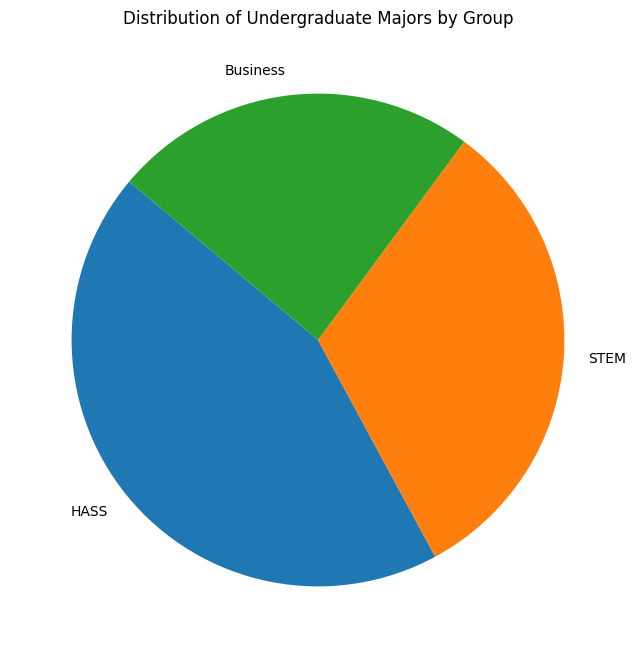

In [35]:
# Now the data has been set up let's create the pie chart

# size of the pie chart
plt.figure(figsize=(8, 8))

# creating the pie chart with labels and percentages
plt.pie(group_counts, labels=group_counts.index, startangle=140)
plt.title('Distribution of Undergraduate Majors by Group')  # adding a title to the pie chart

# Display the pie chart
plt.show()

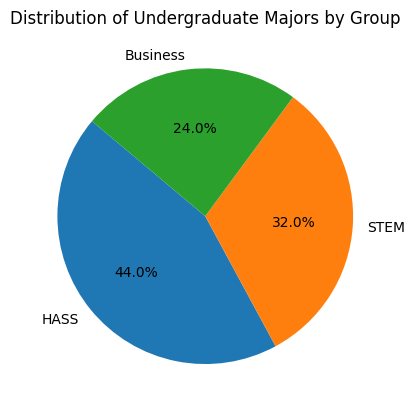

In [36]:

# HOW CAN WE SEE THE PERCENTAGES?


# creating the pie chart with labels and percentages

# autopct='%.0f%%' - creates the percentages for us and rounds to the nearest whole number

plt.pie(group_counts, labels=group_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Undergraduate Majors by Group')  # adding a title to the pie chart

# Display the pie chart
plt.show()